# Treinamento da rede

Este notebook aplica todos os conceitos que vimos em um treinamento completo para classificação de imagens. Todas as funções associadas com processamento do dataset foram incluídas no arquivo `dataset.py` e as funções que realizam o treinamento foram incluídas no arquivo `train.py`

Este notebook leva algumas horas para rodar em uma GPU, e mais tempo ainda em uma CPU

In [1]:
# Célula para baixar os dados. Execute apenas uma vez!
from torchvision.datasets.utils import download_and_extract_archive

def download(root):

    url_images = 'https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz'
    url_targets = 'https://thor.robots.ox.ac.uk/~vgg/data/pets/annotations.tar.gz'

    download_and_extract_archive(url_images, root, remove_finished=False)
    download_and_extract_archive(url_targets, root, remove_finished=False)

#download('data')

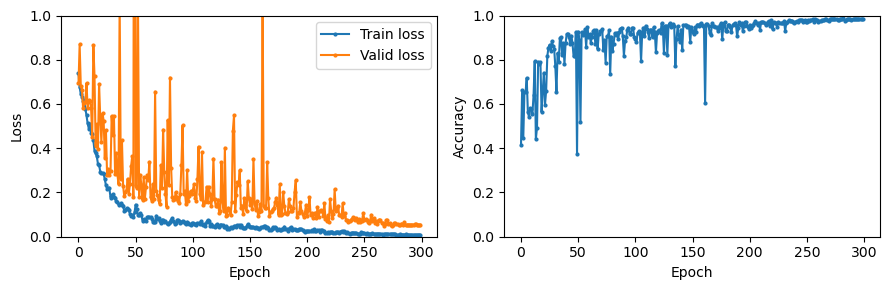

In [2]:
from torch import nn
from torchvision import models
import train

params = {
    'bs':256,
    'num_epochs':300,
    'lr':0.01,
    'weight_decay':1e-2,
    'resize_size':224,  # Tamanho das imagens de treinamento
    'seed':0
}
model = models.resnet18()
# Modifica a última camada do modelo para classificar em 2 classes
model.fc = nn.Linear(model.fc.in_features, 2)
ds_train, ds_valid, logger = train.train(model, **params)
# Cada época demora em torno de 6.1 segundos em uma RTX3080 Ti

Se necessário, é possível continuar treinando a rede, mesmo após reiniciar o notebook. Bastaria fazermos:

In [3]:
import torch
from torch import nn
from torchvision import models
import train


params = {
    'bs':256,
    'num_epochs':50,   # Treina por mais 50 épocas
    'lr':0.001,        # Learning rate menor do que o treinamento original
    'weight_decay':1e-3,
    'resize_size':224,  
    'seed':1
}

# Carrega pesos do modelo salvo
checkpoint = torch.load('../data/checkpoints/M06/checkpoint.pt')
model = models.resnet18()
model.fc = nn.Linear(model.fc.in_features, 2)
model.load_state_dict(checkpoint['model'])
# Treina mais um pouco. A linha está comentada para evitar a execução
#ds_train, ds_valid, logger = train.train(model, **params)

<All keys matched successfully>